In [65]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
cover_path = 'D:/Cover/ALASKA_v2_BMP_256_COLOR'
stego_path = 'D:/Stego/26_Image_Steganography/23_Image_Steganography/ALASKA_v2_BMP_256_COLOR/'

In [67]:
def calc_residual(stego, cover):
    residual = np.abs(stego.astype(np.int16) - cover.astype(np.int16)).astype(np.uint8)
    return residual

In [68]:
bpp = ['0.50', '0.40', '0.30', '0.20', '0.10', '0.05']

In [69]:
def show_img(cover_path: str, stego_path: str, count: int, multiple: int,
                                            color_B: int, color_G, color_R):
    filenames_stego = os.listdir(stego_path)
    filenames_stego = list(filter(lambda x: x if x[-4:] == '.png'
                                                else None, filenames_stego))
    i = 0
    if count == -1:
        count = len(filenames_stego)
    for filename in filenames_stego[:count]:
        stego = cv2.imread(os.path.join(stego_path, filename))
        cover = cv2.imread(os.path.join(cover_path, filename[:-4]+'.bmp'))
        img_s = calc_residual(stego, cover) * multiple

        channels = cv2.split(img_s)

        colors = ['B', 'G', 'R']
        for ch, color in zip(channels, colors):
            ch_total = np.cumsum(ch)
            if color == 'B':
                color_B += ch_total[-1]
            if color == 'G':
                color_G += ch_total[-1]
            if color == 'R':
                color_R += ch_total[-1]
        i += 1

    color_t = ['b', 'g', 'r']
    values = [color_B, color_G, color_R]
    plt.figure(figsize=(7,7))

    ch_per = [0,0,0]

    for i in range(3):
        ch_per[i] = values[i] /sum(values) * 100

    x = np.arange(3)
    plt.bar(x, ch_per, color = color_t)
    plt.title('Plot of channel', fontsize=20)

    for index, value in enumerate(ch_per):
        plt.text(index - 0.125 , value + 0.5, str(value)[:5]+"%")

    plt.xticks(x, colors)
    plt.yticks(fontsize = 20)

    plt.show()

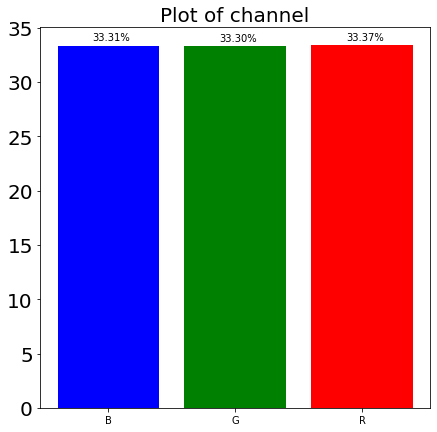

In [70]:
#bpp 0.50, multiple 50
show_img(cover_path, os.path.join(stego_path, bpp[0]), -1, 1, 0, 0, 0)

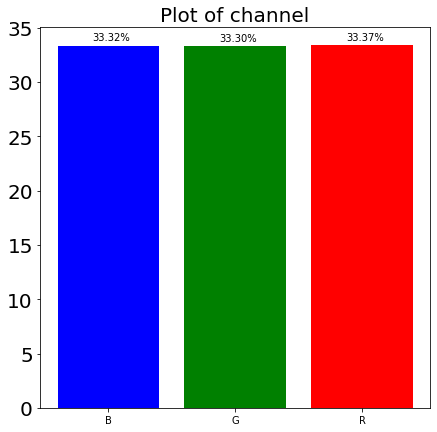

In [71]:
#bpp 0.40, multiple 50
show_img(cover_path, os.path.join(stego_path, bpp[1]), -1, 1, 0, 0, 0)

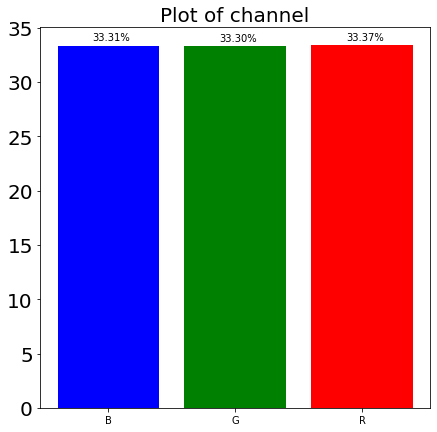

In [72]:
#bpp 0.30, multiple 50
show_img(cover_path, os.path.join(stego_path, bpp[2]), -1, 1, 0, 0, 0)

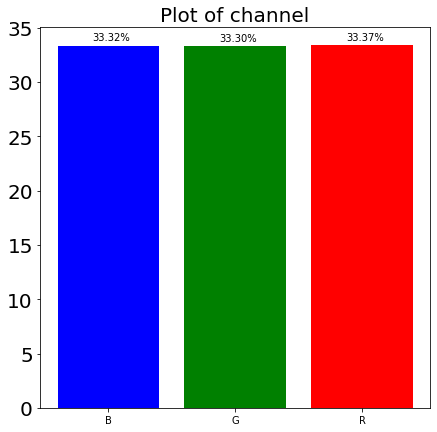

In [73]:
#bpp 0.20, multiple 100
show_img(cover_path, os.path.join(stego_path, bpp[3]), -1, 1, 0, 0, 0)

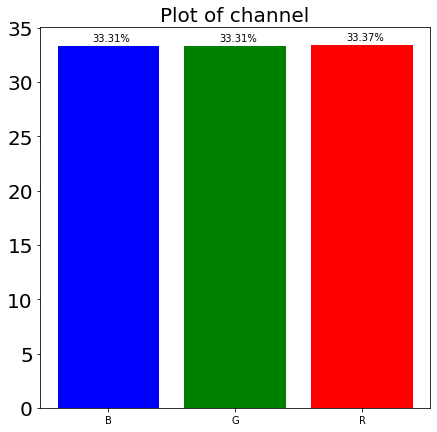

In [74]:
#bpp 0.10, multiple 100
show_img(cover_path, os.path.join(stego_path, bpp[4]), -1, 1, 0, 0, 0)

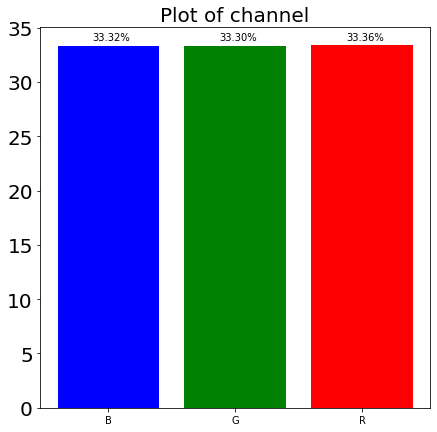

In [75]:
#bpp 0.05, multiple 100
show_img(cover_path, os.path.join(stego_path, bpp[5]), -1, 1, 0, 0, 0)